In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%matplotlib inline

#Parsing and reading the dataset

In [ ]:
DataDir = '/content/drive/MyDrive/PS 1/Datasets/KTH-TIPS-2B/KTH-TIPS2-b'
Categories = ['aluminium_foil', 'brown_bread', 'corduroy', 'cork', 'cotton', 'cracker', 'lettuce_leaf', 'linen', 'white_bread', 'wood','wool']
Sample = 'sample_c'
n_des = []
images = []
y = np.array([])
X =np.zeros(32)
Y = np.array([])
X.reshape(1,32)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
c = -1
catCount = np.zeros(11)
for category in Categories:
  path = os.path.join(DataDir,category)
  path = os.path.join(path,Sample)
  c = c +1
  class_num = Categories.index(category)
  for imgname in os.listdir(path):
    img = cv.imread(os.path.join(path,imgname))
    orb = cv.ORB_create(nfeatures = 1000)
    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    des = np.array(des)
    if len(kp) > 0:
      X = np.vstack((X,des))
      images.append(des)
      y = np.append(y,[class_num])
      n_des.append(len(kp))
      for i in range(0,len(kp)):
        Y = np.append(Y,[class_num])
        catCount[c] = catCount[c] + 1
        
  


## Cummulative sum of number of Descriptos for each image

In [ ]:
sn_des = np.zeros(len(n_des) + 1)
for i in range(len(n_des)):
  sn_des[i+1] = sn_des[i] + n_des[i]

print(sn_des)

[     0.    752.   1332. ... 625669. 626444. 627220.]


In [ ]:
#images = []

#for i in range(len(sn_des)):
#  if i == 1188:
#    break
#  images.append(X[int(sn_des[i]):int(sn_des[i+1])])
     

In [ ]:
images = np.array(images)
print(images.shape)
print(images[0].shape)


(1103,)
(752, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
#images = []

#for category in Categories:
#  path = os.path.join(DataDir,category)
#  path = os.path.join(path,Sample)
#  #c = c +1
#  #class_num = Categories.index(category)
#  for imgname in os.listdir(path):
 #   img = cv.imread(os.path.join(path,imgname))
  #  orb = cv.ORB_create(nfeatures = 500)
   # kp = orb.detect(img,None)
    #kp, des = orb.compute(img, kp)
    ##n_des.append(len(kp))
   # #y = np.append(y,[class_num])
#    des = np.array(des)
 #   if len(kp) > 0:
  #    #X = np.vstack((X,des))
   #   images.append(des)
    #  #for i in range(0,len(kp)):
     #   #Y = np.append(Y,[class_num])
      #  #atCount[c] = catCount[c] + 1

In [ ]:
print(X)
print((X.shape))
print(Y)
print(len(Y))
print(len(n_des))
print(n_des)
print(len(y))
print(y)

[[  0.   0.   0. ...   0.   0.   0.]
 [248. 198. 213. ... 163.   4.  33.]
 [221. 221.  31. ... 115. 233.  34.]
 ...
 [ 33.  59. 175. ... 235. 118. 250.]
 [172. 153. 120. ... 170.  68. 114.]
 [163. 240.  46. ...  13.  21. 239.]]
(627221, 32)
[ 0.  0.  0. ... 10. 10. 10.]
627220
1103
[752, 580, 568, 644, 741, 761, 716, 709, 746, 641, 654, 741, 733, 580, 661, 672, 749, 709, 759, 581, 757, 609, 701, 693, 707, 641, 746, 729, 712, 739, 703, 735, 627, 665, 734, 750, 543, 675, 709, 751, 748, 748, 773, 585, 674, 771, 727, 709, 688, 750, 705, 710, 762, 759, 703, 760, 705, 755, 739, 501, 695, 741, 711, 704, 724, 663, 706, 751, 746, 766, 715, 759, 697, 685, 658, 717, 749, 680, 731, 688, 711, 729, 698, 660, 667, 544, 734, 679, 740, 719, 720, 681, 787, 648, 738, 546, 706, 751, 753, 759, 690, 724, 675, 678, 744, 747, 780, 703, 611, 719, 677, 606, 712, 667, 660, 571, 667, 743, 663, 675, 723, 718, 704, 656, 658, 699, 711, 729, 610, 740, 681, 678, 671, 741, 696, 698, 638, 616, 688, 755, 689, 696, 622, 6

In [ ]:
 X = np.delete(X,0,0)

print(X)

[[248. 198. 213. ... 163.   4.  33.]
 [221. 221.  31. ... 115. 233.  34.]
 [ 61.  71. 237. ... 251.  80.  33.]
 ...
 [ 33.  59. 175. ... 235. 118. 250.]
 [172. 153. 120. ... 170.  68. 114.]
 [163. 240.  46. ...  13.  21. 239.]]


In [ ]:
df = pd.DataFrame(data = X)
df['Category'] = Y.tolist()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,Category
0,248.0,198.0,213.0,101.0,58.0,14.0,67.0,56.0,54.0,175.0,167.0,112.0,87.0,55.0,136.0,118.0,87.0,84.0,108.0,40.0,40.0,149.0,105.0,31.0,233.0,239.0,49.0,84.0,178.0,163.0,4.0,33.0,0.0
1,221.0,221.0,31.0,214.0,36.0,70.0,212.0,177.0,228.0,18.0,174.0,0.0,218.0,121.0,57.0,227.0,64.0,116.0,124.0,106.0,105.0,225.0,147.0,108.0,227.0,171.0,102.0,16.0,8.0,115.0,233.0,34.0,0.0
2,61.0,71.0,237.0,109.0,52.0,46.0,110.0,16.0,37.0,232.0,123.0,228.0,243.0,99.0,145.0,242.0,94.0,228.0,93.0,110.0,137.0,176.0,65.0,8.0,230.0,237.0,160.0,144.0,110.0,251.0,80.0,33.0,0.0
3,13.0,142.0,229.0,69.0,20.0,46.0,235.0,186.0,118.0,170.0,126.0,68.0,209.0,97.0,145.0,102.0,53.0,68.0,124.0,172.0,129.0,244.0,245.0,14.0,77.0,174.0,229.0,132.0,239.0,224.0,80.0,160.0,0.0
4,195.0,160.0,39.0,213.0,44.0,14.0,233.0,57.0,126.0,248.0,210.0,80.0,240.0,210.0,213.0,103.0,100.0,5.0,126.0,175.0,227.0,221.0,247.0,89.0,133.0,56.0,235.0,144.0,8.0,160.0,81.0,172.0,0.0


#Train Test Split (80-20)

In [ ]:
from sklearn.model_selection import train_test_split

#x = df.drop(['Category'],axis ='columns')
#y = df.Category


x_train_imgs, x_test_imgs, y_train, y_test = train_test_split(images, y, test_size=0.2)

print(len(x_train_imgs))
print(len(x_test_imgs))

882
221


In [ ]:
print(x_train_imgs.shape)
print(y_train.shape)
print(x_test_imgs.shape)
print(y_test.shape)

(882,)
(882,)
(221,)
(221,)


In [ ]:
x_train = np.zeros(32).reshape(1,32)
for d in x_train_imgs:
  x_train = np.vstack((x_train,d[:][:]))


In [ ]:
x_train = np.delete(x_train,0,0)

In [ ]:
print(x_train)
print(x_train.shape)

[[  2. 177. 235. ...   8. 220.  23.]
 [131. 153.  37. ...  36.  49. 220.]
 [ 57. 153.  58. ...  14. 219. 222.]
 ...
 [ 33. 121. 123. ... 146.  98. 249.]
 [120. 105.  26. ...  59.  40.  40.]
 [169. 233. 122. ... 138. 235. 232.]]
(500089, 32)


In [ ]:
x_test = np.zeros(32).reshape(1,32)
for d in x_test_imgs:
  x_test = np.vstack((x_test,d[:][:]))

x_test = np.delete(x_test,0,0)

In [ ]:
print(x_test)
print(x_test.shape)

[[220. 125. 250. ... 255.  12.  43.]
 [143. 177. 164. ... 124. 181. 254.]
 [  9. 187. 177. ... 132. 137. 213.]
 ...
 [243.  28. 238. ... 116.  29.  94.]
 [ 74. 191. 232. ... 197. 214.  91.]
 [ 28. 176. 183. ...  39.  37. 118.]]
(127131, 32)


#Importing Libraries for K-means clustering and classifiers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

# from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

## Number of clusters

In [ ]:
n = 100

#KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters = n, random_state=0)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_.shape

(100, 32)

In [ ]:
print(kmeans.labels_)
print(kmeans.labels_.shape)

[59 87 89 ...  5 94  8]
(500089,)


In [ ]:
pred = kmeans.predict(x_test)

In [ ]:
print(pred.shape)
print(pred)


(127131,)
[14 37 92 ... 14 72  3]


(array([1275., 1208., 1305., 1495., 1186., 1208., 1227., 1187., 1393.,
        1272., 1225., 1396., 1349., 1430., 1406., 1196., 1194., 1228.,
        1198., 1297., 1395., 1274., 1277., 1246., 1397., 1119., 1330.,
        1267., 1248., 1300., 1263., 1355., 1239., 1234., 1093., 1258.,
        1275., 1225., 1318., 1331., 1219., 1347., 1363., 1302., 1266.,
        1417., 1216., 1128., 1359., 1121., 1338., 1215., 1271., 1348.,
        1074., 1265., 1292., 1290., 1251., 1213., 1232., 1440., 1323.,
        1255., 1266., 1123.,  952., 1259., 1402., 1412., 1215., 1252.,
        1306., 1341., 1179., 1189., 1186., 1291., 1230., 1124., 1200.,
        1359., 1285., 1262., 1264., 1239., 1196., 1278., 1294., 1258.,
        1278., 1368., 1338., 1222., 1439., 1357., 1288., 1348., 2467.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4

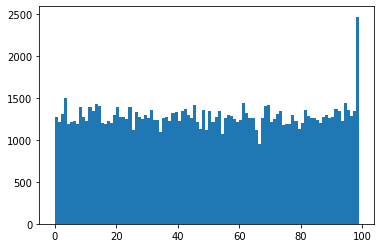

In [ ]:
plt.hist(pred, bins = np.arange(n))

In [ ]:
cstr = np.zeros(len(x_train_imgs) + 1)
for i in range(len(x_train_imgs)):
  cstr[i+1] = cstr[i] + len(x_train_imgs[i])

print(cstr)
print(cstr.shape)

[     0.    578.   1230.   1703.   2341.   2967.   2993.   3013.   3015.
   3539.   4258.   5022.   5060.   5384.   6042.   6653.   7416.   7994.
   8741.   9444.  10011.  10655.  10995.  11625.  12280.  12979.  13541.
  14215.  14836.  15452.  15515.  16211.  16881.  17546.  17556.  18251.
  18907.  19409.  19995.  20591.  21264.  21891.  22490.  23174.  23954.
  24663.  25173.  25650.  26317.  26928.  27695.  28364.  28402.  29074.
  29090.  29675.  30380.  31135.  31161.  31612.  31617.  32337.  32826.
  33591.  34362.  35026.  35533.  35990.  36106.  36816.  36826.  37516.
  38291.  39045.  39655.  39683.  40360.  40930.  40972.  41739.  42258.
  42936.  42993.  43045.  43757.  44191.  44902.  45374.  46045.  46715.
  47455.  48101.  48707.  49475.  50222.  50968.  51720.  52486.  52902.
  53346.  53377.  54078.  54832.  55245.  56003.  56632.  57410.  57423.
  58010.  58555.  59212.  59987.  60652.  61316.  61987.  62546.  63275.
  63300.  63895.  64576.  65334.  65913.  66124.  6

In [ ]:
cste = np.zeros(len(x_test_imgs) + 1)
for i in range(len(x_test_imgs)):
  cste[i+1] = cste[i] + len(x_test_imgs[i])

print(cste)
print(cste.shape)

[     0.    619.   1294.   1901.   2075.   2841.   2991.   3634.   3643.
   4401.   5072.   5746.   6501.   7072.   7829.   8595.   9343.   9448.
  10201.  10912.  11671.  12304.  12358.  13023.  13613.  14342.  14844.
  14896.  15563.  16335.  16996.  17663.  18361.  19127.  19915.  19987.
  20518.  21205.  21869.  21927.  22224.  22931.  23605.  24249.  24800.
  25357.  25610.  26384.  27038.  27629.  28268.  29033.  29678.  30455.
  31166.  31712.  32462.  33097.  33272.  34044.  34722.  34739.  35245.
  35839.  36622.  37353.  38127.  38902.  39548.  40271.  40287.  40858.
  41516.  42142.  42741.  42775.  43351.  43648.  44418.  45087.  45821.
  46559.  47203.  47871.  48617.  49218.  49741.  50387.  51015.  51034.
  51660.  52289.  52983.  53573.  54344.  54956.  55018.  55646.  56318.
  56978.  57716.  58494.  59191.  59966.  60643.  61416.  62056.  62489.
  63110.  63871.  64495.  65080.  65799.  66548.  67320.  67397.  67993.
  68332.  69099.  69659.  69663.  69716.  70316.  7

# Getting histogram scalars for each image 

In [ ]:
x_input = []
x_test_input =[]

In [ ]:
hists = []
for i in range(len(cstr)):
  if i == len(cstr)-1:
    break
  x_hist = np.histogram(kmeans.labels_[int(cstr[i]):int(cstr[i+1])], bins = np.arange(n+1))
  x_norm = sklearn.preprocessing.normalize(x_hist[0].reshape(-1,1),axis=0)
  hists.append(x_norm)
  flag = 0

x_input = np.stack(hists).reshape(-1,n)
  

In [ ]:
print(x_input.shape)

(882, 100)


In [ ]:
hists = []
for i in range(len(cste)):
  if i == len(cste)-1:
    break
  x_hist = np.histogram(pred[int(cste[i]):int(cste[i+1])], bins = np.arange(n+1))
  x_norm = sklearn.preprocessing.normalize(x_hist[0].reshape(-1,1),axis=0)
  hists.append(x_norm)
  flag = 0

x_test_input = np.stack(hists).reshape(-1,n)

In [ ]:
print(x_test_input.shape)

(221, 100)


#KNN

In [ ]:
KNN_1 = KNeighborsClassifier(1)
KNN_1.fit(x_input, y_train)
KNN_1.score(x_test_input,y_test)

0.7601809954751131

In [ ]:
KNN_5 = KNeighborsClassifier(5)
KNN_5.fit(x_input, y_train)
KNN_5.score(x_test_input,y_test)

0.7239819004524887

In [ ]:
KNN_10 = KNeighborsClassifier(10)
KNN_10.fit(x_input, y_train)
KNN_10.score(x_test_input,y_test)

0.7194570135746606

In [ ]:
KNN_20 = KNeighborsClassifier(20)
KNN_20.fit(x_input, y_train)
KNN_20.score(x_test_input,y_test)

0.6742081447963801

In [ ]:
KNN_40 = KNeighborsClassifier(40)
KNN_40.fit(x_input, y_train)
KNN_40.score(x_test_input,y_test)

0.6470588235294118

In [ ]:
KNN_100 = KNeighborsClassifier(100)
KNN_100.fit(x_input, y_train)
KNN_100.score(x_test_input,y_test)


0.5565610859728507

In [ ]:
KNN_200 = KNeighborsClassifier(200)
KNN_200.fit(x_input, y_train)
KNN_200.score(x_test_input,y_test)

0.46153846153846156

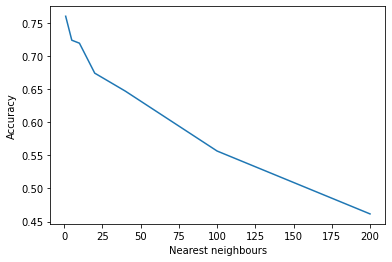

In [ ]:
knnx = [1,5,10,20,40,100,200]
knny = [KNN_1.score(x_test_input,y_test),KNN_5.score(x_test_input,y_test),KNN_10.score(x_test_input,y_test),KNN_20.score(x_test_input,y_test),KNN_40.score(x_test_input,y_test), KNN_100.score(x_test_input,y_test),KNN_200.score(x_test_input,y_test)]
plt.xlabel('Nearest neighbours')
plt.ylabel('Accuracy')
plt.plot(knnx,knny)

#Gaussian Naive Bayes

In [ ]:
GNB_clf = GaussianNB() 
GNB_clf.fit(x_input, y_train)
GNB_clf.score(x_test_input,y_test)

0.7692307692307693

#Multinomial Naive Bayes

In [ ]:
MNB_clf = MultinomialNB()
MNB_clf.fit(x_input, y_train)
MNB_clf.score(x_test_input,y_test)

0.6787330316742082

#Support Vector Machine

In [ ]:
SVM_clf = svm.SVC()
SVM_clf.fit(x_input, y_train)
SVM_clf.score(x_test_input,y_test)

0.8371040723981901

#Multilayer Perceptron

In [ ]:
MLP_clf =  MLPClassifier(alpha=1, max_iter=1000)
MLP_clf.fit(x_input, y_train)
MLP_clf.score(x_test_input,y_test)

0.7782805429864253

#Decision Tree Classifier

In [ ]:
 DTC_clf = DecisionTreeClassifier(max_depth=11)
 DTC_clf.fit(x_input, y_train)
 DTC_clf.score(x_test_input,y_test)

0.5520361990950227

##KNN Trained on clustered labels vs categories

In [ ]:
KNN = KNeighborsClassifier(400)
KNN.fit(kmeans.labels_.reshape(-1,1), y_train)
KNN.score(pred.reshape(-1,1),y_test)

0.11841382902349414

##KNN without clustering

In [ ]:
KNN = KNeighborsClassifier(400)
KNN.fit(x_train, y_train)
KNN.score(x_test,y_test)

0.30146820760427373
